In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score , f1_score , confusion_matrix
from sklearn.impute import MissingIndicator , SimpleImputer
from sklearn.linear_model import LogisticRegression , LinearRegression , Lasso , Ridge
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier , GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier , BaggingRegressor , RandomForestClassifier , RandomForestRegressor
from sklearn.svm import LinearSVC , LinearSVR , SVC , SVR
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
Total_Transactions = data.shape[0]
normal = len(data[data['Class']==0])
fraudulent = len(data[data['Class']==1])
fraud_percentage = round((fraudulent/Total_Transactions)*100,2)
print('number of normal transactions are :' , normal)
print('number of fraudulent Transactions are :' , fraudulent)
print('percentage of total transactions that are fraudulent are :{}%'.format(fraud_percentage))

number of normal transactions are : 284315
number of fraudulent Transactions are : 492
percentage of total transactions that are fraudulent are :0.17%


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here We see that the Amount and the Class are only original columns , the other columns are the transformed versions of PCA

In [7]:
print('min transaction amount is : ', min(data.Amount))
print('max transaction amount is : ', max(data.Amount))

min transaction amount is :  0.0
max transaction amount is :  25691.16


<AxesSubplot:xlabel='Class', ylabel='Amount'>

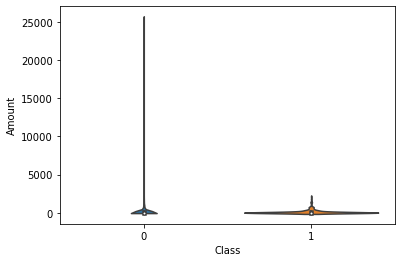

In [8]:
sns.violinplot(x = 'Class' , y = 'Amount' , data = data)
#plt.yscale('log')

<AxesSubplot:xlabel='Class', ylabel='Amount'>

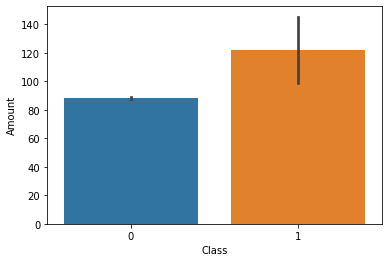

In [9]:
sns.barplot(x = 'Class' , y = 'Amount' , data = data)
#plt.yscale('log')

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
#checking duplicates
data.drop_duplicates(inplace = True)

In [12]:
data.shape

(283726, 31)

In [13]:
X = data.drop('Class' , axis = 1 )

In [14]:
scaled_features = StandardScaler().fit_transform(X)
X = pd.DataFrame(scaled_features , index = X.index , columns = X.columns)

In [15]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,...,0.326273,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,...,-0.089963,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,...,0.681564,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900
3,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,...,-0.270428,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886
4,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,...,0.530343,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813


In [16]:
y = data['Class']

Text(0.5, 1.0, 'Correlation heat map')

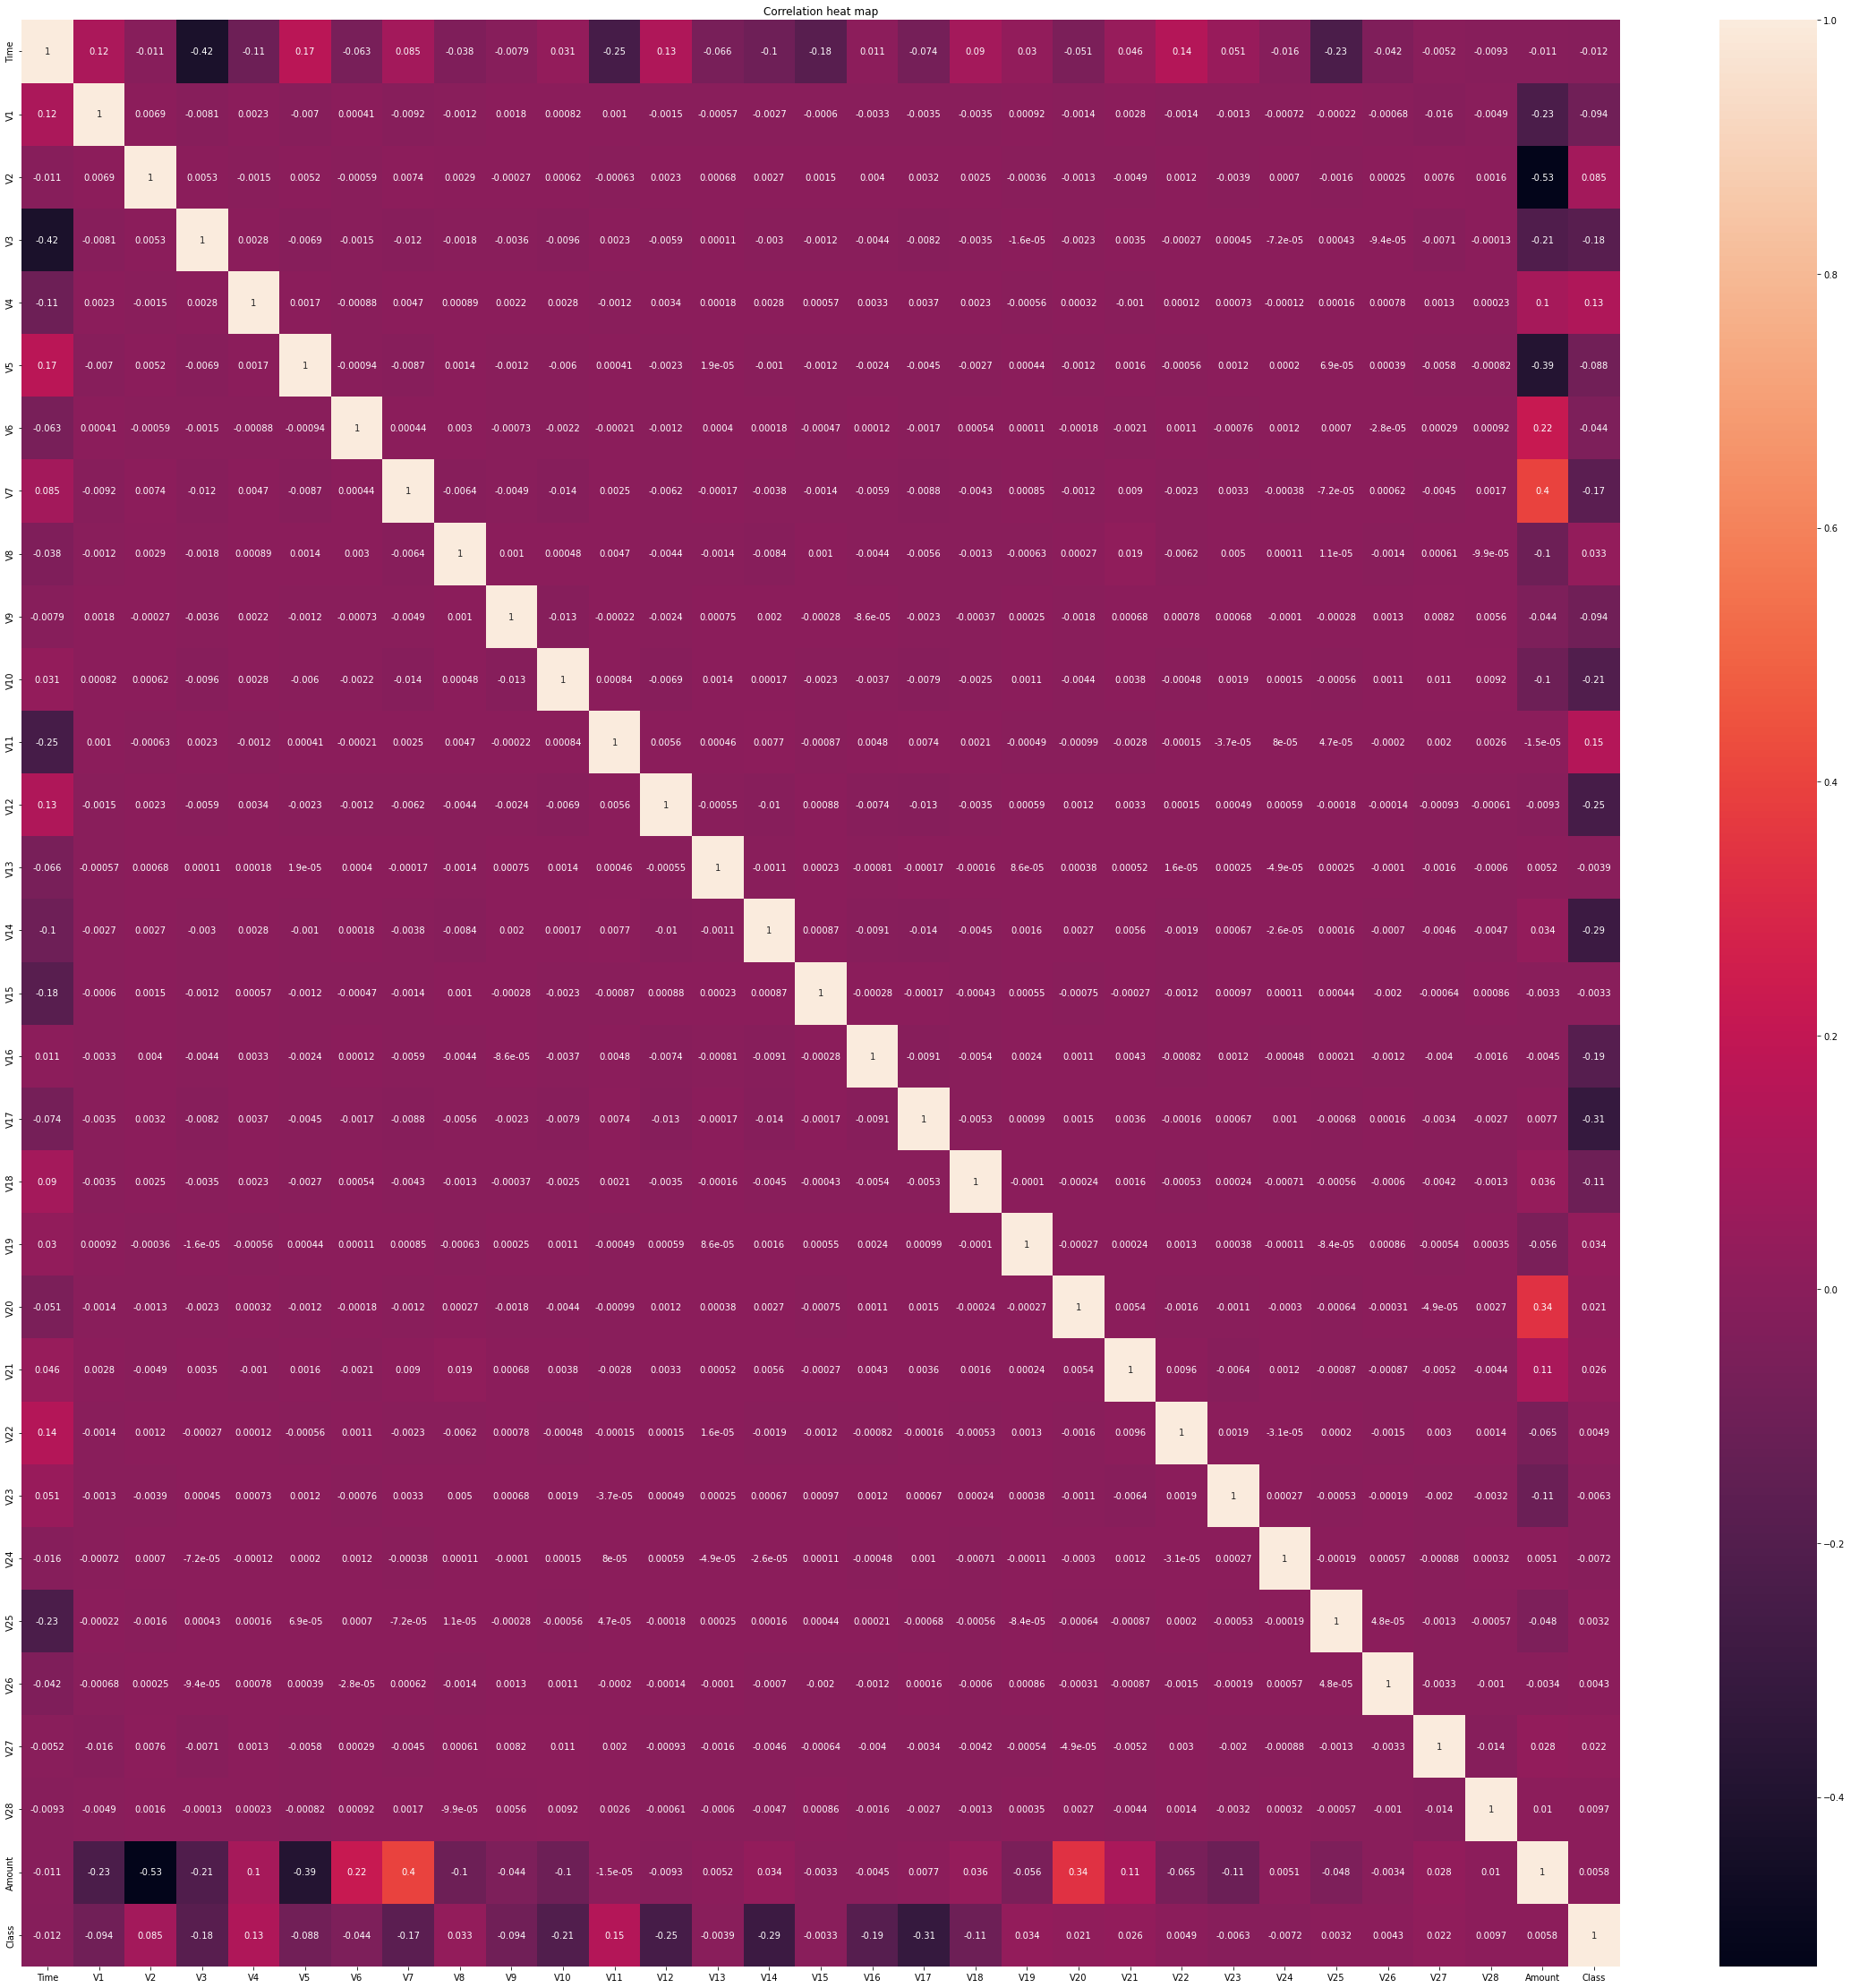

In [17]:
fig , ax = plt.subplots(figsize = (40,40))
sns.heatmap(data.corr() , annot = True ).set_title('Correlation heat map')

In [18]:
data.corr()['Class'].abs().sort_values(ascending = False)

Class     1.000000
V17       0.313498
V14       0.293375
V12       0.250711
V10       0.206971
V16       0.187186
V3        0.182322
V7        0.172347
V11       0.149067
V4        0.129326
V18       0.105340
V1        0.094486
V9        0.094021
V5        0.087812
V2        0.084624
V6        0.043915
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
Time      0.012359
V28       0.009682
V24       0.007210
V23       0.006333
Amount    0.005777
V22       0.004887
V26       0.004265
V13       0.003897
V15       0.003300
V25       0.003202
Name: Class, dtype: float64

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state = 42 )

# Model Building

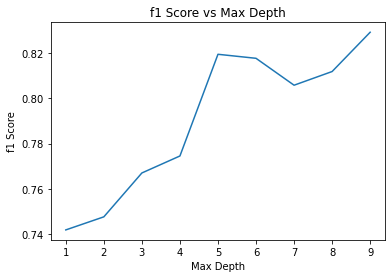

In [20]:
n = [i for i in range(1,10)]
f1_DecisionTree = []
for i in n:
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(X_train , y_train)
    predict_y = clf.predict(X_test)
    f1_DecisionTree.append(f1_score(y_test , predict_y))
    
fig , ax = plt.subplots()
ax.plot(n , f1_DecisionTree)
plt.xlabel('Max Depth')
plt.ylabel('f1 Score')
plt.title('f1 Score vs Max Depth')
plt.show()

In [21]:
#we see that the optimum value for max_depth = 5
clf = DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train , y_train)
predict_y = clf.predict(X_test)

In [22]:
print('accuracy of the Decision Tree Model is :' ,accuracy_score(y_test , predict_y))

accuracy of the Decision Tree Model is : 0.999464275644279


Since the data is imbalanced here , accuracy is not a good metric

Trying F1-Score , Confusion Matrix as the metrics

In [23]:
print('f1-score for the Decision Tree Model is :' , f1_score(y_test , predict_y))

f1-score for the Decision Tree Model is : 0.8155339805825244


In [24]:
print(confusion_matrix(y_test , predict_y))

[[70810    10]
 [   28    84]]


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
n = [i for i in range(1,15)]
f1 = []
for i in n:
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train , y_train)
    y_predict = KNN.predict(X_test)
    f1.append(f1_score(y_test , y_predict))



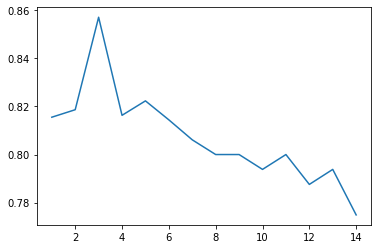

In [27]:
fig , ax = plt.subplots()
ax.plot(n , f1)
plt.show()

We see that the value of n = 3 gives the best value for f1_score

In [28]:
print('f1_score for the value of k = 3 is' , f1[2])

f1_score for the value of k = 3 is 0.8571428571428572


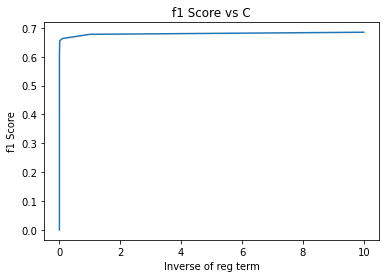

In [29]:
#checking f1 score for different values of C (inverse of regularization coefficient)
x = [10**x for x in range (-5,2)]
f1_log = []
for i in x:
    lr = LogisticRegression(C = i)
    lr.fit(X_train, y_train)
    predict_y = lr.predict(X_test)
    f1_log.append(f1_score(y_test , predict_y))

fig , ax = plt.subplots()
ax.plot(x , f1_log)
plt.xlabel('Inverse of reg term')
plt.ylabel('f1 Score')
plt.title('f1 Score vs C')
plt.show()    

Using elbow method , we observe that using the value of C = 1 is optimal

In [30]:
lr = LogisticRegression(C=1)
lr.fit(X_train , y_train)
predict_y = lr.predict(X_test)

In [31]:
print('accuracy for the Logistic Regression Model is :' ,accuracy_score(y_test , predict_y))

accuracy for the Logistic Regression Model is : 0.9991682174476963


In [32]:
print('f1_score for the Logistic Regression Model is :' , f1_score(y_test , predict_y))

f1_score for the Logistic Regression Model is : 0.6775956284153005


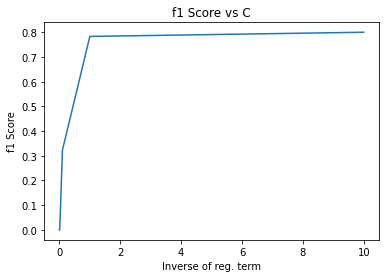

In [33]:
#checking f1 score for different values of C (inverse of regularization coefficient)
x = [10**x for x in range (-5,2)]
f1_log = []
for i in x:
    lr = SVC(C = i)
    lr.fit(X_train, y_train)
    predict_y = lr.predict(X_test)
    f1_log.append(f1_score(y_test , predict_y))

fig , ax = plt.subplots()
ax.plot(x , f1_log)
plt.xlabel('Inverse of reg. term')
plt.ylabel('f1 Score')
plt.title('f1 Score vs C')
plt.show()    

We see that the value of C = 1 is the optimal value of hyperparameter C (inverse of regularization coefficient) here

In [34]:
lr = LogisticRegression(C=1)
lr.fit(X_train , y_train)
predict_y = lr.predict(X_test)

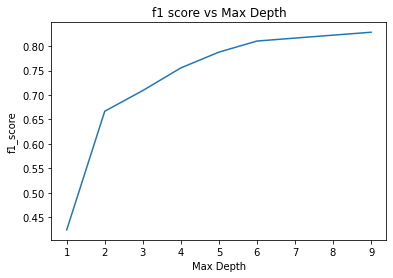

In [35]:
n = [x for x in range(1,10)]
f1_xgb = []
for i in n:
    clf = RandomForestClassifier(max_depth = i)
    clf.fit(X_train , y_train)
    predict_y = clf.predict(X_test)
    f1_xgb.append(f1_score(y_test , predict_y))

fig , ax = plt.subplots()
ax.plot(n , f1_xgb)
plt.xlabel('Max Depth')
plt.ylabel('f1_score')
plt.title('f1 score vs Max Depth')
plt.show()

The optimal value of max depth = 6 seems the most suitable , using the elbow method

In [36]:
clf = RandomForestClassifier(max_depth = 6)
clf.fit(X_train , y_train)
predict_y = clf.predict(X_test)

In [37]:
print('accuracy for the Logistic Regression Model is :' ,accuracy_score(y_test , predict_y))

accuracy for the Logistic Regression Model is : 0.9994783736536401


In [38]:
print('f1_score for the Logistic Regression Model is :' , f1_score(y_test , predict_y))

f1_score for the Logistic Regression Model is : 0.8102564102564103


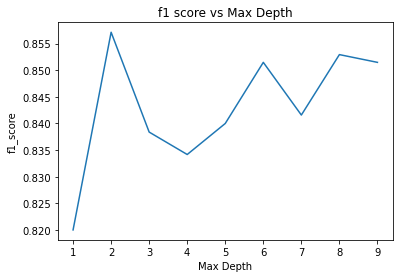

In [39]:
n = [x for x in range(1,10)]
f1_xgb = []
for i in n:
    clf = XGBClassifier(max_depth = i)
    clf.fit(X_train , y_train)
    predict_y = clf.predict(X_test)
    f1_xgb.append(f1_score(y_test , predict_y))

fig , ax = plt.subplots()
ax.plot(n , f1_xgb)
plt.xlabel('Max Depth')
plt.ylabel('f1_score')
plt.title('f1 score vs Max Depth')
plt.show()

In [40]:
clf = XGBClassifier(max_depth = 2)
clf.fit(X_train , y_train)
predict_y = clf.predict(X_test)

In [41]:
print('accuracy for the Logistic Regression Model is :' ,accuracy_score(y_test , predict_y))

accuracy for the Logistic Regression Model is : 0.9995911577285287


In [42]:
print('f1_score for the Logistic Regression Model is :' , f1_score(y_test , predict_y))

f1_score for the Logistic Regression Model is : 0.8571428571428572
